# Case Study: Predicting Charging Demand - EV Data Intelligence Lead

# Exploratory analysis of existing EV stations

In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import folium

In [2]:
# load dataset and drop all empty columns
charging_station = pd.read_csv('alt_fuel_stations (Nov 16 2024).csv', parse_dates=['Open Date']).dropna(axis=1, how='all', inplace=False)
charging_station.columns

C:\Users\gbooy\AppData\Local\Temp\ipykernel_20392\437179640.py:2: DtypeWarning: Columns (20,31,39,46,74) have mixed types. Specify dtype option on import or set low_memory=False.
  charging_station = pd.read_csv('alt_fuel_stations (Nov 16 2024).csv', parse_dates=['Open Date']).dropna(axis=1, how='all', inplace=False)


Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Station Phone',
       'Status Code', 'Groups With Access Code', 'Access Days Time',
       'Cards Accepted', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Other Info', 'EV Network', 'EV Network Web',
       'Geocode Status', 'Latitude', 'Longitude', 'Date Last Confirmed', 'ID',
       'Updated At', 'Owner Type Code', 'Federal Agency ID',
       'Federal Agency Name', 'Open Date', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'Groups With Access Code (French)', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'EV Pricing',
       'EV Pricing (French)', 'EV On-Site Renewable Source',
       'Restricted Access', 'NPS Unit Name', 'Maximum Vehicle Class',
       'EV Workplace Charging', 'Funding Sources'],
      dtype='object')

#### HeatMap on Existing EV Stations Across the US 

In [6]:
#create list of coordinate pairs using list comprehension
coord_list = [(lat, lon) for lat, lon in zip(charging_station.Latitude, charging_station.Longitude) if not math.isnan(lat) and not math.isnan(lon)]

In [9]:
from folium import plugins

m = folium.Map(location=(32.899470, -117.243000), tiles='Cartodb dark matter', zoom_start=4)
plugins.HeatMap(coord_list, radius=20).add_to(m)

m

In [10]:
#filter columns
charging_stations = charging_station[charging_station['Country'].isin(['US'])].filter(['ID','Station Name','Street Address', 'Intersection Directions', 'City','State','ZIP','EV Level1 EVSE Num','EV Level2 EVSE Num','EV DC Fast Count','EV Network','Latitude','Longitude','Open Date','EV Connector Types','Facility Type','EV Pricing','EV Workplace Charging'])
charging_stations.head()

ID                            Station Name           Street Address  \
0  1523           Los Angeles Convention Center       1201 S Figueroa St   
1  6355                  Scripps Green Hospital  10666 N Torrey Pines Rd   
2  6405                           Galpin Motors        15421 Roscoe Blvd   
3  6425                       Galleria at Tyler   1299 Galleria at Tyler   
4  6505  City of Pasadena - Holly Street Garage           150 E Holly St   

              Intersection Directions         City State          ZIP  \
0            West hall and South hall  Los Angeles    CA  ZCTA5 90015   
1  Patient Parking Structure, level G     La Jolla    CA  ZCTA5 92037   
2                                 NaN    Sepulveda    CA  ZCTA5 91343   
3                                 NaN    Riverside    CA  ZCTA5 92503   
4                                 NaN     Pasadena    CA  ZCTA5 91103   

   EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count     EV Network  \
0                 NaN                 7.0               NaN  Non-Networked   
1                 NaN                 1.0               NaN  Non-Networked   
2                 NaN                 2.0               NaN  Non-Networked   
3                 NaN                 4.0               NaN  Non-Networked   
4                 NaN                16.0               NaN  Non-Networked   

    Latitude   Longitude  Open Date EV Connector Types   Facility Type  \
0  34.040539 -118.271387 1995-08-30              J1772  PARKING_GARAGE   
1  32.899470 -117.243000 1997-07-30              J1772        HOSPITAL   
2  34.221665 -118.468371 2012-12-11              J1772      CAR_DEALER   
3  33.909914 -117.459053 1997-08-30              J1772   SHOPPING_MALL   
4  34.147620 -118.147111 1997-08-30              J1772  PARKING_GARAGE   

          EV Pricing  EV Workplace Charging  
0  Free; parking fee                  False  
1  Free; parking fee                  False  
2                NaN                  False  
3               Free                  False  
4               Free                  False

In [11]:
charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69042 entries, 0 to 81385
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       69042 non-null  int64         
 1   Station Name             69041 non-null  object        
 2   Street Address           69042 non-null  object        
 3   Intersection Directions  21574 non-null  object        
 4   City                     69037 non-null  object        
 5   State                    69042 non-null  object        
 6   ZIP                      69042 non-null  object        
 7   EV Level1 EVSE Num       178 non-null    float64       
 8   EV Level2 EVSE Num       58763 non-null  float64       
 9   EV DC Fast Count         11631 non-null  float64       
 10  EV Network               69042 non-null  object        
 11  Latitude                 69042 non-null  float64       
 12  Longitude                69042 n

In [12]:
# identify top 5 states with the most stations
charging_stations.groupby('State')['ID'].count().sort_values(ascending=False).head()

State
CA    16575
NY     4488
TX     3630
FL     3569
MA     3317
Name: ID, dtype: int64

In [13]:
# identify top 5 ZIPs with the most stations
charging_stations.groupby('ZIP')['State'].count().sort_values(ascending=False).head()

ZIP
ZCTA5 95054    298
ZCTA5 94025    298
ZCTA5 92618    283
ZCTA5 98121    169
ZCTA5 98004    168
Name: State, dtype: int64

In [14]:
# identify where most stations are installed
charging_stations['Facility Type'].value_counts().head()

HOTEL              3069
CAR_DEALER         1903
PARKING_LOT        1334
PUBLIC             1140
SHOPPING_CENTER     688
Name: Facility Type, dtype: int64

In [15]:
# identify other places where stations are installed
charging_stations['Facility Type'].unique()

array(['PARKING_GARAGE', 'HOSPITAL', 'CAR_DEALER', 'SHOPPING_MALL',
       'GROCERY', 'HOTEL', 'AIRPORT', nan, 'OFFICE_BLDG', 'MUNI_GOV',
       'SHOPPING_CENTER', 'COLLEGE_CAMPUS', 'PARKING_LOT', 'PARK',
       'LIBRARY', 'REC_SPORTS_FACILITY', 'TRAVEL_CENTER',
       'CONVENIENCE_STORE', 'MUSEUM', 'PAY_LOT', 'PLACE_OF_WORSHIP',
       'PAY_GARAGE', 'RESTAURANT', 'OTHER_ENTERTAINMENT', 'UTILITY',
       'B_AND_B', 'STREET_PARKING', 'GAS_STATION', 'FLEET_GARAGE',
       'RESEARCH_FACILITY', 'BREWERY_DISTILLERY_WINERY', 'STORAGE',
       'STATE_GOV', 'INN', 'COOP', 'CAMPGROUND', 'NATL_PARK',
       'CONVENTION_CENTER', 'SCHOOL', 'FIRE_STATION',
       'STANDALONE_STATION', 'MULTI_UNIT_DWELLING', 'RV_PARK',
       'AUTO_REPAIR', 'ARENA', 'BANK', 'REST_STOP', 'OTHER', 'FED_GOV',
       'CARWASH', 'HARDWARE_STORE', 'TRUCK_STOP', 'STADIUM', 'FACTORY',
       'MOTOR_POOL', 'RENTAL_CAR_RETURN', 'RETAIL', 'FUEL_RESELLER',
       'PUBLIC', 'WORKPLACE', 'PHARMACY'], dtype=object)

In [16]:
# which connection types are mostly installed 
charging_stations['EV Connector Types'].value_counts().head()

J1772                 52658
CHADEMO J1772COMBO     4711
TESLA                  4637
J1772COMBO             2694
J1772 TESLA            2346
Name: EV Connector Types, dtype: int64

In [17]:
# create new column total EV chargers
all_chargers = ['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']
charging_stations['Total EV Chargers'] = charging_stations[all_chargers].sum(axis=1)

In [18]:
# view states with most chargers across level1, level2, DCFC and total
charging_stations.groupby('State')['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'Total EV Chargers'].sum().sort_values(by='Total EV Chargers', ascending=False).head()

C:\Users\gbooy\AppData\Local\Temp\ipykernel_20392\1816618382.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  charging_stations.groupby('State')['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'Total EV Chargers'].sum().sort_values(by='Total EV Chargers', ascending=False).head()


EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count  \
State                                                             
CA                  232.0             35743.0           12849.0   
NY                   11.0             13768.0            1896.0   
FL                   22.0              7962.0            2862.0   
TX                    0.0              7335.0            3076.0   
MA                   21.0              7123.0            1032.0   

       Total EV Chargers  
State                     
CA               48824.0  
NY               15675.0  
FL               10846.0  
TX               10411.0  
MA                8176.0

##### California leads the way in electric station infrastructure. Not only do they have the most EV chargers, they also have the most level 1, level 2 and DCFC

In [19]:
charging_stations.groupby('State')['EV Level1 EVSE Num'].sum().sort_values(ascending=False).head()

State
CA    232.0
GA    196.0
CO     55.0
VA     30.0
OR     28.0
Name: EV Level1 EVSE Num, dtype: float64

In [20]:
charging_stations.groupby('State')['EV Level2 EVSE Num'].sum().sort_values(ascending=False).head()

State
CA    35743.0
NY    13768.0
FL     7962.0
TX     7335.0
MA     7123.0
Name: EV Level2 EVSE Num, dtype: float64

In [21]:
charging_stations.groupby('State')['EV DC Fast Count'].sum().sort_values(ascending=False).head()

State
CA    12849.0
TX     3076.0
FL     2862.0
NY     1896.0
WA     1464.0
Name: EV DC Fast Count, dtype: float64

# Treating of missing values

In [22]:
# EV Level1 EVSE Num, EV Level2 EVSE Num, EV DC Fast Count, Facility Type, EV Pricing all have considerable null values. We will fill the EV Level1 EVSE Num, EV Level2 EVSE Num, EV DC Fast Count with zero.
charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69042 entries, 0 to 81385
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       69042 non-null  int64         
 1   Station Name             69041 non-null  object        
 2   Street Address           69042 non-null  object        
 3   Intersection Directions  21574 non-null  object        
 4   City                     69037 non-null  object        
 5   State                    69042 non-null  object        
 6   ZIP                      69042 non-null  object        
 7   EV Level1 EVSE Num       178 non-null    float64       
 8   EV Level2 EVSE Num       58763 non-null  float64       
 9   EV DC Fast Count         11631 non-null  float64       
 10  EV Network               69042 non-null  object        
 11  Latitude                 69042 non-null  float64       
 12  Longitude                69042 n

In [23]:
# fill nas with zero
charging_stations[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].fillna(0, inplace=True)

C:\Users\gbooy\AppData\Local\Temp\ipykernel_20392\441943420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_stations[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].fillna(0, inplace=True)


In [24]:
# For the facility type column we would use a model to predict the null values. We will use street name, street address, city and intersection directions to train a RandomForestClassifier model

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


# Drop rows with missing Facility Type
df = charging_stations.dropna(subset=["Facility Type"])

# Combine relevant textual features and fill na with empty string
df["Combined Features"] = df[['Station Name', 'Street Address', 'City', 'Intersection Directions']].fillna("").agg(" ".join, axis=1)

# Split into features and target
X = df[["Combined Features"]]
y = df["Facility Type"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for text-based feature extraction and modeling
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),  # Text vectorization
    ("classifier", RandomForestClassifier(random_state=42))  # Classification model
])

# Train the model
pipeline.fit(X_train["Combined Features"], y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test["Combined Features"])
print(classification_report(y_test, y_pred))


C:\Users\gbooy\AppData\Local\Temp\ipykernel_20392\3373619709.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Combined Features"] = df[['Station Name', 'Street Address', 'City', 'Intersection Directions']].fillna("").agg(" ".join, axis=1)


                           precision    recall  f1-score   support

                  AIRPORT       0.89      0.74      0.81        34
                    ARENA       0.00      0.00      0.00         2
              AUTO_REPAIR       0.00      0.00      0.00         7
                     BANK       0.89      0.81      0.85        21
BREWERY_DISTILLERY_WINERY       0.85      0.65      0.74        52
                  B_AND_B       0.95      0.86      0.90        22
               CAMPGROUND       1.00      0.25      0.40         8
               CAR_DEALER       0.93      0.96      0.94       373
           COLLEGE_CAMPUS       0.85      0.90      0.88        78
        CONVENIENCE_STORE       0.90      0.43      0.58        42
        CONVENTION_CENTER       0.00      0.00      0.00         6
                     COOP       0.50      1.00      0.67         3
                  FED_GOV       0.00      0.00      0.00         5
             FIRE_STATION       1.00      0.67      0.80     

C:\Users\gbooy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbooy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbooy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbooy\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [25]:
# Save the model for future use
import joblib
model_path = "facility_type_model.pkl"
joblib.dump(pipeline, model_path)
print(f"Model saved to {model_path}")

Model saved to facility_type_model.pkl


### 1. Precision, Recall, and F1-Score Explained
Precision measures how many of the predicted positive instances (for a given class) were actually correct. In other words, out of all the predicted instances for a particular class, how many are truly part of that class.
Recall measures how many of the actual positive instances were correctly identified. It tells us how well the model identified all instances of a particular class. F1-Score is the harmonic mean of precision and recall. It balances both precision and recall, with values closer to 1 indicating better performance.


### 2. Interpreting the Result for Each Class
Each row corresponds to a class (e.g., "AIRPORT", "BANK", "CARWASH") and reports the model's performance in terms of precision, recall, and F1-score: Classes with good performance (high values):
For example, "CAR_DEALER" has high precision (0.91), recall (0.95), and F1-score (0.93), which means the model is very good at identifying car dealerships and almost never mislabels them.

"RESEARCH_FACILITY" has perfect scores across the board because the model correctly predicts this rare class every time (only 1 sample).
Classes with poor performance (low values):"ARENA", "AUTO_REPAIR", and "CARWASH" have precision and recall scores of 0.00, meaning the model was unable to correctly predict any instances for these classes (i.e., the model either predicted these classes incorrectly or never predicted them at all).

"FUEL_RESELLER", "FED_GOV", "RETAIL", etc., also show low scores, which indicates these classes are either underrepresented or difficult for the model to distinguish.
Classes with skewed performance:
"CAMPGROUND" has a high precision of 1.00 but low recall (0.36). This means the model is good at predicting campgrounds when it makes predictions, but it misses many actual campgrounds (false negatives).
"HOTEL" has a high recall (0.95), meaning the model catches most hotels but with a slightly lower precision (0.79), indicating some of its predictions for hotels may be incorrect.

### 3. Accuracy and Aggregated Metrics
Accuracy (0.68): This is the overall percentage of correct predictions. It tells us how often the model correctly predicted the class across all instances. The accuracy is reasonable, but considering the class imbalance and skewed performance for certain classes, accuracy might not be the best metric for evaluating performance here.

Macro Average: 
Precision: 0.53: The average precision across all classes. Recall: 0.40: The average recall across all classes. F1-Score: 0.43: The average F1-score across all classes. These averages are calculated without accounting for class imbalance, meaning each class is weighted equally. The macro average is generally lower when there are many underperforming or underrepresented classes.

Weighted Average:
Precision: 0.71: The weighted precision, which accounts for the number of instances in each class, is higher than the macro average. This suggests that the model performs better on the more frequent classes.
Recall: 0.69: Similarly, the recall is higher in the weighted average, again reflecting better performance on more frequent classes.
F1-Score: 0.68: The weighted F1-score also reflects this better performance for larger classes.

### 4. Reasons for Low Performance in Some Classes
Class Imbalance: Many of the categories (e.g., "FUEL_RESELLER", "CARWASH", "RETAIL") have very few samples or are very difficult for the model to distinguish, which could explain why they have very low precision, recall, and F1-scores. 

Underrepresented Classes: Some classes have only one or a few instances (e.g., "STADIUM" with 1 instance, "FED_GOV" with 3), making it difficult for the model to learn these classes effectively.
Misclassification: The model might be confusing certain classes, especially if they are similar or have overlapping features.

### 5. Suggestions for Improving Performance

We won't be improving this model as the facility type is not a key feature in determining EV station location. We will use the model to fill the missing value in the facility column and proceed with other aspect of this analysis.

However to improve this model’s performance, especially for underperforming classes: Address Class Imbalance: You can use techniques like oversampling the minority classes (e.g., using SMOTE) or undersampling the majority classes to make the model more sensitive to rare classes.

Adjust Class Weights: When training the model, adjusting class weights to penalize misclassifications in underrepresented classes might help improve performance for those classes. We can also collect more Data: especially for certain classes that are underrepresented, gathering more data for those classes can improve the model’s ability to learn and generalize for those categories.

Fine-Tuning the Model: Experimenting with different models (e.g., random forests, neural networks) and hyperparameter tuning can help improve overall performance.

In [26]:
# Using the model to predict missing Facility Types
import joblib

predict_station_df = charging_stations

# Load the trained model
model_path = "facility_type_model.pkl"
pipeline = joblib.load(model_path)

# Fill missing values in "Facility Type"
predict_station_df["Facility Type"] = predict_station_df["Facility Type"].fillna("")

# Combine relevant textual features
predict_station_df["Combined Features"] = predict_station_df[['Station Name', 'Street Address', 'City', 'Intersection Directions']].fillna("").agg(" ".join, axis=1)

# Identify rows with missing Facility Type
missing_facility_type = predict_station_df[predict_station_df["Facility Type"] == ""]

# Predict missing Facility Type values using the trained model
predicted_facility_types = pipeline.predict(missing_facility_type["Combined Features"])

# Fill the missing Facility Type values with the predicted values
predict_station_df.loc[predict_station_df["Facility Type"] == "", "Facility Type"] = predicted_facility_types


In [27]:
# Save the updated DataFrame to a new CSV file
output_file_path = "stations_with_facility_types_predictions.csv"
predict_station_df.to_csv(output_file_path, index=False)

print(f"Predictions for missing Facility Type values have been made and saved to {output_file_path}")

Predictions for missing Facility Type values have been made and saved to stations_with_facility_types_predictions.csv


## Calculating station density and distance to closest station

In [28]:
# Load the updated dataset
station_df = predict_station_df.filter(['ID','Station Name','Street Address','City','State','ZIP','EV Level1 EVSE Num','EV Level2 EVSE Num','EV DC Fast Count','EV Network','Latitude','Longitude','Open Date','EV Connector Types','Facility Type','EV Pricing','EV Workplace Charging'])

In [29]:
# Using BallTree approach to calculate station density
# Haversine Metric: The haversine formula calculates distances on a sphere. By using radians, it avoids the complexity of geodesic distance calculations.
# Radius Filtering: Only stations within the given radius (e.g., 10 km) are considered for density calculations.
# Station Density: The number of neighboring stations (excluding the station itself)

from sklearn.neighbors import BallTree

# Filter to California to reduce computational demand
#df = df[df['State'] == 'CA']

# Convert Latitude and Longitude to radians for haversine distance
station_df['Latitude_rad'] = np.radians(station_df['Latitude'])
station_df['Longitude_rad'] = np.radians(station_df['Longitude'])

# Create a BallTree using Latitude and Longitude
coords = station_df[['Latitude_rad', 'Longitude_rad']].values
tree = BallTree(coords, metric='haversine')

# Define Earth's radius in kilometers
earth_radius_km = 6371.0

# Initialize lists for nearest station distance and name
nearest_distances = []
nearest_station_names = []

# Calculate station density and nearest station for each station
station_density = []
for i, coord in enumerate(coords):
    # Query all stations within a search radius
    indices = tree.query_radius([coord], r=10 / earth_radius_km)[0]  # 10 km radius
    
    # Calculate density (exclude the station itself)
    density = len(indices) - 1
    station_density.append(density)

    # Query for the nearest station
    dist, idx = tree.query([coord], k=2)  # k=2 to exclude the station itself
    nearest_distance = dist[0][1] * earth_radius_km  # Convert distance to kilometers
    nearest_station_index = idx[0][1]
    
    # Add nearest station details
    nearest_distances.append(nearest_distance)
    nearest_station_names.append(station_df.iloc[nearest_station_index]['Station Name'])

# Add new columns to the DataFrame
station_df['Station Density'] = station_density
station_df['Nearest Station Distance (km)'] = nearest_distances
station_df['Nearest Station Name'] = nearest_station_names

# Drop temporary radian columns
station_df.drop(['Latitude_rad', 'Longitude_rad'], axis=1, inplace=True)

In [30]:
station_df.head(2)

ID                   Station Name           Street Address         City  \
0  1523  Los Angeles Convention Center       1201 S Figueroa St  Los Angeles   
1  6355         Scripps Green Hospital  10666 N Torrey Pines Rd     La Jolla   

  State          ZIP  EV Level1 EVSE Num  EV Level2 EVSE Num  \
0    CA  ZCTA5 90015                 NaN                 7.0   
1    CA  ZCTA5 92037                 NaN                 1.0   

   EV DC Fast Count     EV Network   Latitude   Longitude  Open Date  \
0               NaN  Non-Networked  34.040539 -118.271387 1995-08-30   
1               NaN  Non-Networked  32.899470 -117.243000 1997-07-30   

  EV Connector Types   Facility Type         EV Pricing  \
0              J1772  PARKING_GARAGE  Free; parking fee   
1              J1772        HOSPITAL  Free; parking fee   

   EV Workplace Charging  Station Density  Nearest Station Distance (km)  \
0                  False              788                       0.287402   
1                  False              301                       0.168504   

        Nearest Station Name  
0      ESSEX AVANT STATION 2  
1  SCRIPPS HEALTH SCRIPPS TP

In [31]:
# Example: Save results for further analysis
df.to_csv("station_density_california.csv", index=False)

# Display results
print(df[['Station Name', 'Station Density']].head())


KeyError: "['Station Density'] not in index"

## Calculating Urban Proximity: Focus on California to reduce computational demand

In [32]:
# Load the urban center dataset
file_path = "Urban Centers.csv"
urban_df = pd.read_csv(file_path)

urban_df.head(5)

Place Name   Latitude   Longitude   Type     Center  \
0  Downtown Los Angeles, CA, USA  34.044727 -118.249283  Urban  Districts   
1           Charlestown, MA, USA  42.379822  -71.064941  Urban  Districts   
2    Watts, Los Angeles, CA, USA  33.943203 -118.247772  Urban  Districts   
3           Stony Brook, NY, USA  40.902771  -73.133850  Urban  Districts   
4       Port Washington, NY, USA  40.827454  -73.699722  Urban  Districts   

  State  
0    CA  
1    MA  
2    CA  
3    NY  
4    NY

In [33]:
# filter only urban centers in califonia
california_urban_df = urban_df[urban_df['State'] == 'CA']
california_urban_df.head(5)

Place Name   Latitude   Longitude   Type     Center  \
0   Downtown Los Angeles, CA, USA  34.044727 -118.249283  Urban  Districts   
2     Watts, Los Angeles, CA, USA  33.943203 -118.247772  Urban  Districts   
8    Venice, Los Angeles, CA, USA  33.988270 -118.472023  Urban  Districts   
10   Lake Los Angeles, CA, the US  34.617779 -117.833611  Urban  Districts   
16  Tujunga, Los Angeles, CA, USA  34.263302 -118.302711  Urban  Districts   

   State  
0     CA  
2     CA  
8     CA  
10    CA  
16    CA

In [34]:
#filter EV stations in california
califonia_station_df = station_df[station_df['State'] == 'CA']
califonia_station_df.head()

ID                            Station Name           Street Address  \
0  1523           Los Angeles Convention Center       1201 S Figueroa St   
1  6355                  Scripps Green Hospital  10666 N Torrey Pines Rd   
2  6405                           Galpin Motors        15421 Roscoe Blvd   
3  6425                       Galleria at Tyler   1299 Galleria at Tyler   
4  6505  City of Pasadena - Holly Street Garage           150 E Holly St   

          City State          ZIP  EV Level1 EVSE Num  EV Level2 EVSE Num  \
0  Los Angeles    CA  ZCTA5 90015                 NaN                 7.0   
1     La Jolla    CA  ZCTA5 92037                 NaN                 1.0   
2    Sepulveda    CA  ZCTA5 91343                 NaN                 2.0   
3    Riverside    CA  ZCTA5 92503                 NaN                 4.0   
4     Pasadena    CA  ZCTA5 91103                 NaN                16.0   

   EV DC Fast Count     EV Network   Latitude   Longitude  Open Date  \
0               NaN  Non-Networked  34.040539 -118.271387 1995-08-30   
1               NaN  Non-Networked  32.899470 -117.243000 1997-07-30   
2               NaN  Non-Networked  34.221665 -118.468371 2012-12-11   
3               NaN  Non-Networked  33.909914 -117.459053 1997-08-30   
4               NaN  Non-Networked  34.147620 -118.147111 1997-08-30   

  EV Connector Types   Facility Type         EV Pricing  \
0              J1772  PARKING_GARAGE  Free; parking fee   
1              J1772        HOSPITAL  Free; parking fee   
2              J1772      CAR_DEALER                NaN   
3              J1772   SHOPPING_MALL               Free   
4              J1772  PARKING_GARAGE               Free   

   EV Workplace Charging  Station Density  Nearest Station Distance (km)  \
0                  False              788                       0.287402   
1                  False              301                       0.168504   
2                  False              314                       0.110214   
3                  False               56                       0.192488   
4                  False              195                       0.000000   

                     Nearest Station Name  
0                   ESSEX AVANT STATION 2  
1               SCRIPPS HEALTH SCRIPPS TP  
2                     15475 W ROSCOE BLVD  
3    Galleria at Tyler Southeast Entrance  
4  City of Pasadena - Holly Street Garage

In [35]:
# Convert latitude and longitude to radians for geodesic distance calculation
california_urban_df['Latitude_rad'] = np.radians(california_urban_df['Latitude'])
california_urban_df['Longitude_rad'] = np.radians(california_urban_df['Longitude'])


# Convert station coordinates to radians
califonia_station_df['Latitude_rad'] = np.radians(califonia_station_df['Latitude'])
califonia_station_df['Longitude_rad'] = np.radians(califonia_station_df['Longitude'])

# Create a BallTree using urban centers' latitude and longitude
urban_coords = california_urban_df[['Latitude_rad', 'Longitude_rad']].values
tree = BallTree(urban_coords, metric='haversine')

# Calculate the distance from each station to the nearest urban center
station_coords = califonia_station_df[['Latitude_rad', 'Longitude_rad']].values
distances, indices = tree.query(station_coords, k=1)

# Add the nearest urban center and the distance to the DataFrame
califonia_station_df['Nearest Urban Center'] = california_urban_df.iloc[indices.flatten()]['Place Name'].values
califonia_station_df['Distance to Nearest Urban Center (km)'] = distances.flatten() * 6371  # Convert from radians to kilometers

# Drop temporary radian columns
califonia_station_df.drop(['Latitude_rad', 'Longitude_rad'], axis=1, inplace=True)

C:\Users\gbooy\AppData\Local\Temp\ipykernel_20392\802966973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_urban_df['Latitude_rad'] = np.radians(california_urban_df['Latitude'])
C:\Users\gbooy\AppData\Local\Temp\ipykernel_20392\802966973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_urban_df['Longitude_rad'] = np.radians(california_urban_df['Longitude'])
C:\Users\gbooy\AppData\Local\Temp\ipykernel_20392\802966973.py:7: SettingWithCopyWarning: 
A value is trying to be set on 

In [36]:
# Show the updated stations data with proximity information
califonia_station_df.head()

ID                            Station Name           Street Address  \
0  1523           Los Angeles Convention Center       1201 S Figueroa St   
1  6355                  Scripps Green Hospital  10666 N Torrey Pines Rd   
2  6405                           Galpin Motors        15421 Roscoe Blvd   
3  6425                       Galleria at Tyler   1299 Galleria at Tyler   
4  6505  City of Pasadena - Holly Street Garage           150 E Holly St   

          City State          ZIP  EV Level1 EVSE Num  EV Level2 EVSE Num  \
0  Los Angeles    CA  ZCTA5 90015                 NaN                 7.0   
1     La Jolla    CA  ZCTA5 92037                 NaN                 1.0   
2    Sepulveda    CA  ZCTA5 91343                 NaN                 2.0   
3    Riverside    CA  ZCTA5 92503                 NaN                 4.0   
4     Pasadena    CA  ZCTA5 91103                 NaN                16.0   

   EV DC Fast Count     EV Network  ...  Open Date  EV Connector Types  \
0               NaN  Non-Networked  ... 1995-08-30               J1772   
1               NaN  Non-Networked  ... 1997-07-30               J1772   
2               NaN  Non-Networked  ... 2012-12-11               J1772   
3               NaN  Non-Networked  ... 1997-08-30               J1772   
4               NaN  Non-Networked  ... 1997-08-30               J1772   

    Facility Type         EV Pricing EV Workplace Charging Station Density  \
0  PARKING_GARAGE  Free; parking fee                 False             788   
1        HOSPITAL  Free; parking fee                 False             301   
2      CAR_DEALER                NaN                 False             314   
3   SHOPPING_MALL               Free                 False              56   
4  PARKING_GARAGE               Free                 False             195   

   Nearest Station Distance (km)                    Nearest Station Name  \
0                       0.287402                   ESSEX AVANT STATION 2   
1                       0.168504               SCRIPPS HEALTH SCRIPPS TP   
2                       0.110214                     15475 W ROSCOE BLVD   
3                       0.192488    Galleria at Tyler Southeast Entrance   
4                       0.000000  City of Pasadena - Holly Street Garage   

                Nearest Urban Center Distance to Nearest Urban Center (km)  
0      Downtown Los Angeles, CA, USA                              2.089191  
1                  La Jolla, CA, USA                              6.464255  
2  North Hills, Los Angeles, CA, USA                              2.230581  
3                 Riverside, CA, USA                              7.549845  
4                  Pasadena, CA, USA                              1.685224  

[5 rows x 22 columns]

In [37]:
# Save the result to a CSV file
califonia_station_df_output_path = "calc_centers.csv"
califonia_station_df.to_csv(califonia_station_df_output_path, index=False)

print(f"califonia_station_df_output_path {califonia_station_df_output_path}")


califonia_station_df_output_path calc_centers.csv


## Identifying Underserved Areas

#### Locations with station density below the 20th percentile are marked as underserved using the Is_Underserved column.

We can use clustering with DBSCAN: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to group underserved locations into clusters for better visualization and prioritization.

In [38]:
from sklearn.cluster import DBSCAN

# Thresholds for underserved areas
low_density_threshold = califonia_station_df['Station Density'].quantile(0.2)  # Bottom 20% for density
urban_distance_threshold = 20  # Example: more than 20 km from the nearest urban center

# Identify underserved locations based on both station density and urban center distance
califonia_station_df['Is_Underserved'] = (
    (califonia_station_df['Station Density'] <= low_density_threshold) &
    (califonia_station_df['Distance to Nearest Urban Center (km)'] > urban_distance_threshold)
)

# Define Earth's radius in kilometers
earth_radius_km = 6371.0

# Specify a clustering radius in kilometers (e.g., 10 km)
radius_km = 10

# Convert the radius to radians
radius_rad = radius_km / earth_radius_km

# Use DBSCAN to find clusters of underserved areas
underserved_coords = califonia_station_df[califonia_station_df['Is_Underserved']][['Latitude', 'Longitude']].values
dbscan = DBSCAN(eps=radius_rad, min_samples=2, metric='haversine')  # eps in radians

# Initialize default cluster values
califonia_station_df['Underserved_Cluster'] = -1  # Default: non-underserved points

# Apply clustering if there are underserved coordinates
if len(underserved_coords) > 0:
    clusters = dbscan.fit_predict(np.radians(underserved_coords))
    califonia_station_df.loc[califonia_station_df['Is_Underserved'], 'Underserved_Cluster'] = clusters

C:\Users\gbooy\AppData\Local\Temp\ipykernel_20392\172041698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  califonia_station_df['Is_Underserved'] = (
C:\Users\gbooy\AppData\Local\Temp\ipykernel_20392\172041698.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  califonia_station_df['Underserved_Cluster'] = -1  # Default: non-underserved points


In [39]:
califonia_station_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16575 entries, 0 to 81373
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     16575 non-null  int64         
 1   Station Name                           16575 non-null  object        
 2   Street Address                         16575 non-null  object        
 3   City                                   16575 non-null  object        
 4   State                                  16575 non-null  object        
 5   ZIP                                    16575 non-null  object        
 6   EV Level1 EVSE Num                     36 non-null     float64       
 7   EV Level2 EVSE Num                     14551 non-null  float64       
 8   EV DC Fast Count                       2329 non-null   float64       
 9   EV Network                             16575 non-null  object

In [68]:
# Filter for underserved clusters only
underserved_locations_califonia = califonia_station_df[califonia_station_df['Underserved_Cluster'] != -1]

# Output results
# print(underserved_locations_califonia[['Latitude', 'Longitude', 'Station Density', 'Distance to Nearest Urban Center (km)', 'Underserved_Cluster']].head())

In [72]:
# Save the result to a CSV file
underserved_locations_califonia_output_path = "underserved_locations_califonia.csv"
underserved_locations_califonia.to_csv(underserved_locations_califonia_output_path, index=False)

print(f"underserved_locations_califonia_output_path {underserved_locations_califonia_output_path}")


underserved_locations_califonia_output_path underserved_locations_califonia.csv


### Measuring the Accuracy of the Model

##### Accuracy for a Clustering-Based Model
Since this is an unsupervised clustering model (e.g., DBSCAN), accuracy can’t be measured directly as there is no predefined "ground truth." However, we can evaluate the model using the following approaches:

#### Coverage Metrics
Calculate the ratio of underserved locations to total locations:

In [44]:
# Calculate the total underserved locations
total_underserved_location = underserved_locations['Is_Underserved'].count()

# Calculate the total station locations
total_station_location = califonia_station_df['Is_Underserved'].count()

# Compute the proportion
proportion_underserved = total_underserved_location / total_station_location

print(f"Proportion of underserved location: {proportion_underserved:.2%}")


Proportion of underserved location: 3.56%


#### Internal Evaluation: Silhouette Score
Measures how well clusters are defined (compact and well-separated).
Values range from -1 to 1 (higher is better).

In [45]:
from sklearn.metrics import silhouette_score

# Ensure you have the clustered data (excluding non-clustered points)
cluster_data = underserved_coords[clusters != -1]
cluster_labels = clusters[clusters != -1]

# Calculate silhouette score
silhouette_avg = silhouette_score(np.radians(cluster_data), cluster_labels, metric='haversine')
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.88


##  Visualize Underserved Locations

#### Create interactive map using folium

In [69]:
import folium
from folium.plugins import MarkerCluster

# Create a Folium map centered around California
m = folium.Map(location=[36.7783, -119.4179], zoom_start=10)

# Add a marker cluster for underserved locations
marker_cluster = MarkerCluster().add_to(m)

# Add markers for underserved locations
for _, row in underserved_locations_califonia.iterrows():
    popup_text = (f"Latitude: {row['Latitude']}<br>"
                  f"Longitude: {row['Longitude']}<br>"
                  f"Station Density: {row['Station Density']}<br>"
                  f"Cluster ID: {row['Underserved_Cluster']}")
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Save map to an HTML file
output_path = "underserved_locations_map.html"
m.save(output_path)
print(f"Map saved to {output_path}")

# Display the map in Jupyter Notebook (optional)
m


Map saved to underserved_locations_map.html


#### Create static map using matplotlib

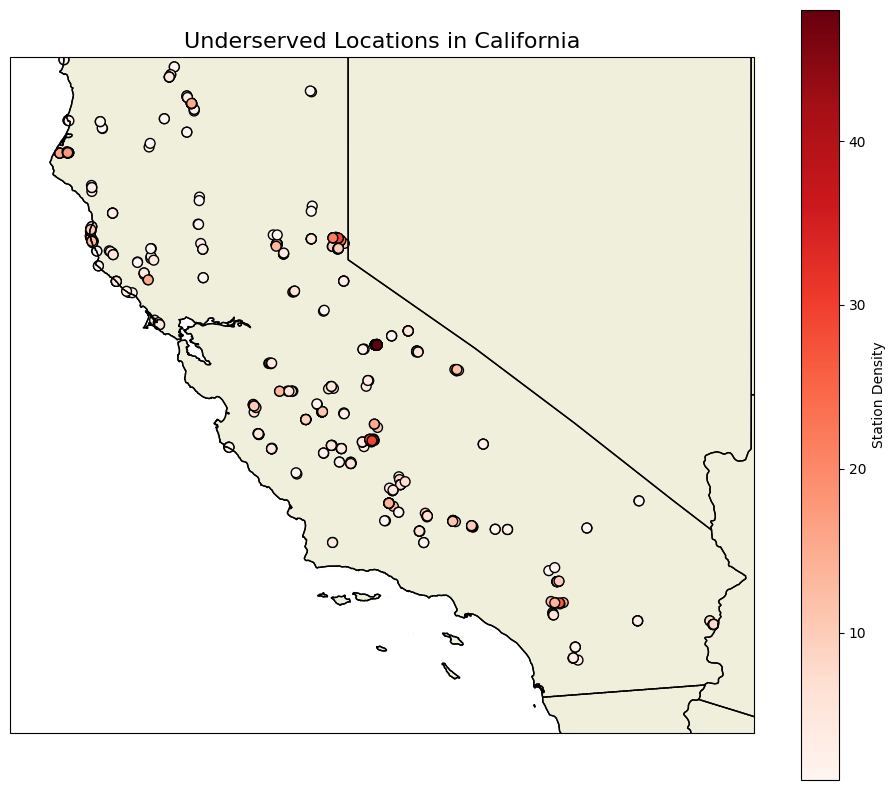

In [70]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-125, -114, 32, 42], crs=ccrs.PlateCarree())  # California's bounding box

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='black')

# Plot underserved locations
scatter = ax.scatter(
    underserved_locations_califonia['Longitude'], underserved_locations_califonia['Latitude'], c=underserved_locations_califonia['Station Density'], cmap='Reds',
    edgecolor='k', s=50, transform=ccrs.PlateCarree()
)
plt.colorbar(scatter, label="Station Density")
plt.title("Underserved Locations in California", fontsize=16)
plt.show()


#### Overlay Urban Center as point on map

In [71]:
import folium
from folium.plugins import MarkerCluster

# Load underserved locations and urban center data
stations_df = underserved_locations_califonia
urban_centers_df = california_urban_df

# Create a Folium map centered around California
m = folium.Map(location=[36.7783, -119.4179], zoom_start=8)

# Add a marker cluster for underserved locations
underserved_cluster = MarkerCluster(name="Underserved Locations").add_to(m)

# Add markers for underserved locations
for _, row in stations_df.iterrows():
    popup_text = (f"Latitude: {row['Latitude']}<br>"
                  f"Longitude: {row['Longitude']}<br>"
                  f"Station Density: {row['Station Density']}<br>"
                  f"Cluster ID: {row['Underserved_Cluster']}")
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(underserved_cluster)

# Add urban centers as distinct markers
urban_center_layer = folium.FeatureGroup(name="Urban Centers")
for _, row in urban_centers_df.iterrows():
    popup_text = (f"Urban Center: {row['Place Name']}<br>"
                  f"Latitude: {row['Latitude']}<br>"
                  f"Longitude: {row['Longitude']}")
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(urban_center_layer)

# Add the urban center layer to the map
urban_center_layer.add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save the map to an HTML file
output_path = "underserved_locations_with_urban_centers.html"
m.save(output_path)
print(f"Map saved to {output_path}")

# Display the map (optional in Jupyter Notebook)
m


Map saved to underserved_locations_with_urban_centers.html


## Improving the Model - Introducing additional features

### Introducing Population Density, Housing Density, Mean Income and Geographic Area

#### Data cleaning

In [49]:
income = pd.read_csv('C:/Users/gbooy/Downloads/EV Charging Data/Income/ACSST5Y2022.S1902-Data.csv').filter(['Geographic Area Name','Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households'])
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33774 entries, 0 to 33773
Data columns (total 2 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Geographic Area Name                                               33774 non-null  object
 1   Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households  33774 non-null  object
dtypes: object(2)
memory usage: 527.8+ KB


C:\Users\gbooy\AppData\Local\Temp\ipykernel_20392\3858934758.py:1: DtypeWarning: Columns (39,55,95) have mixed types. Specify dtype option on import or set low_memory=False.
  income = pd.read_csv('C:/Users/gbooy/Downloads/EV Charging Data/Income/ACSST5Y2022.S1902-Data.csv').filter(['Geographic Area Name','Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households'])


In [50]:
income['Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households'].replace('N', 0, inplace=True)
income['Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households'].replace('-', 0, inplace=True)
convert_int = {'Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households': int}
income = income.astype(convert_int)

income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33774 entries, 0 to 33773
Data columns (total 2 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Geographic Area Name                                               33774 non-null  object
 1   Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households  33774 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 395.9+ KB


In [51]:
homevalue = pd.read_csv('Housing Density.csv').filter(['Geographic Area Name','Estimate!!Total:','Estimate!!Total:!!$500,000 to $749,999','Estimate!!Total:!!$750,000 to $999,999','Estimate!!Total:!!$1,000,000 to $1,499,999','Estimate!!Total:!!$1,500,000 to $1,999,999','Estimate!!Total:!!$2,000,000 or more'])
homevalue.columns
homevalue.columns=['Area', 'Housing Density','500K-750k','750K-1M','1M-1.5M','1.5M-2M','Over2M']

In [52]:
population = pd.read_csv("Population Density.csv")  # Contains Latitude, Longitude, Population Density
population.columns

Index(['Geography', 'Geographic Area', 'Population Density'], dtype='object')

In [53]:
land_area = pd.read_csv('C:/Users/gbooy/Downloads/EV Charging Data/GEOINFO2023.GEOINFO-2024-11-16T132450.csv')
land_area['LandArea_SQMI'] = land_area['AREALAND_SQMI'].replace(',', '', regex=True).astype(float)
land_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33774 entries, 0 to 33773
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Geographic Area Name                   33774 non-null  object 
 1   Area Land in square meters             33774 non-null  int64  
 2   Area Water in square meters            33774 non-null  int64  
 3   AREALAND_SQMI                          33774 non-null  float64
 4   AREAWATR_SQMI                          33774 non-null  float64
 5   Internal Point (Latitude) (INTPTLAT)   33774 non-null  float64
 6   Internal Point (Longitude) (INTPTLON)  33774 non-null  object 
 7   LandArea_SQMI                          33774 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.1+ MB


#### Merge dataset with existing EV station dataset

In [54]:
califonia_station_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16575 entries, 0 to 81373
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     16575 non-null  int64         
 1   Station Name                           16575 non-null  object        
 2   Street Address                         16575 non-null  object        
 3   City                                   16575 non-null  object        
 4   State                                  16575 non-null  object        
 5   ZIP                                    16575 non-null  object        
 6   EV Level1 EVSE Num                     36 non-null     float64       
 7   EV Level2 EVSE Num                     14551 non-null  float64       
 8   EV DC Fast Count                       2329 non-null   float64       
 9   EV Network                             16575 non-null  object

In [55]:
# Perform iterative merging
merged_df = califonia_station_df.merge(population, left_on='ZIP', right_on='Geographic Area', how='left')  # First merge
merged_df2 = merged_df.merge(land_area, left_on='ZIP', right_on='Geographic Area Name', how='left')  # Second merge
enhanced_location_df = merged_df2.merge(homevalue, left_on='ZIP', right_on='Area', how='left').drop(['Area','AREALAND_SQMI','Internal Point (Longitude) (INTPTLON)','Internal Point (Latitude) (INTPTLAT)','AREAWATR_SQMI','Area Water in square meters','Area Land in square meters','Geographic Area Name','Geographic Area','Geography','1.5M-2M','1M-1.5M','750K-1M','500K-750k','Over2M'], axis=1)  # Third merge

enhanced_location_df.head(2)

ID                   Station Name           Street Address         City  \
0  1523  Los Angeles Convention Center       1201 S Figueroa St  Los Angeles   
1  6355         Scripps Green Hospital  10666 N Torrey Pines Rd     La Jolla   

  State          ZIP  EV Level1 EVSE Num  EV Level2 EVSE Num  \
0    CA  ZCTA5 90015                 NaN                 7.0   
1    CA  ZCTA5 92037                 NaN                 1.0   

   EV DC Fast Count     EV Network  ...  Station Density  \
0               NaN  Non-Networked  ...              788   
1               NaN  Non-Networked  ...              301   

   Nearest Station Distance (km)       Nearest Station Name  \
0                       0.287402      ESSEX AVANT STATION 2   
1                       0.168504  SCRIPPS HEALTH SCRIPPS TP   

            Nearest Urban Center Distance to Nearest Urban Center (km)  \
0  Downtown Los Angeles, CA, USA                              2.089191   
1              La Jolla, CA, USA                              6.464255   

  Is_Underserved  Underserved_Cluster  Population Density  LandArea_SQMI  \
0          False                   -1             27324.0          1.693   
1          False                   -1             41260.0         12.046   

  Housing Density  
0          1107.0  
1         10065.0  

[2 rows x 27 columns]

#### Creating new features

###### Refined Features
Station Count per ZIP:
Count the number of stations in each ZIP to measure infrastructure density.
Population per Station:
Calculate the ratio of total population density to the number of stations in a ZIP.
Housing Units per Station:
Measure housing density relative to the number of stations in a ZIP.

In [56]:
# Group by ZIP for aggregations
zip_group = enhanced_location_df.groupby('ZIP')

# 1. Station Count per ZIP
enhanced_location_df['Station_Count_ZIP'] = enhanced_location_df['ZIP'].map(
    zip_group['ID'].count()
)

# 2. Population per Station in ZIP
enhanced_location_df['Population_Per_Station_ZIP'] = enhanced_location_df['Population Density'] / enhanced_location_df['Station_Count_ZIP']

# 3. Housing Units per Station in ZIP
enhanced_location_df['Housing_Per_Station_ZIP'] = enhanced_location_df['Housing Density'] / enhanced_location_df['Station_Count_ZIP']

# Display the updated DataFrame
enhanced_location_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16575 entries, 0 to 16574
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     16575 non-null  int64         
 1   Station Name                           16575 non-null  object        
 2   Street Address                         16575 non-null  object        
 3   City                                   16575 non-null  object        
 4   State                                  16575 non-null  object        
 5   ZIP                                    16575 non-null  object        
 6   EV Level1 EVSE Num                     36 non-null     float64       
 7   EV Level2 EVSE Num                     14551 non-null  float64       
 8   EV DC Fast Count                       2329 non-null   float64       
 9   EV Network                             16575 non-null  object

##### 
Station Count per ZIP (Station_Count_ZIP): Counts the number of unique stations (ID) within each ZIP.

Population per Station (Population_Per_Station_ZIP): Divides the Population Density by the number of stations in the ZIP to assess how well the population is served.

Housing Units per Station (Housing_Per_Station_ZIP): Divides the Housing Density by the number of stations in the ZIP to measure station coverage for housing.

## Predict New Station Locations

### With the addition of new features to enhance the dataset. We will attempt to identify underserved locations:
Station Count per ZIP (Station_Count_ZIP), Population per Station (Population_Per_Station_ZIP), Housing Units per Station (Housing_Per_Station_ZIP), Station Density, Distance to Nearest Station (km)

### We will use clustering to identify underserved locations

In [57]:
# Load the enhanced dataset
enhanced_location_df

# Select relevant features
features = [
    'Station Density', 'Nearest Station Distance (km)',
    'Population_Per_Station_ZIP', 'Housing_Per_Station_ZIP', 'Station_Count_ZIP'
]
X = enhanced_location_df[features].fillna(0)  # Fill missing values with 0

# Scale features to a consistent range
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps based on data scale
enhanced_location_df['Cluster'] = dbscan.fit_predict(X_scaled)

# Filter for underserved clusters (e.g., isolated clusters)
underserved_locations2 = enhanced_location_df[enhanced_location_df['Cluster'] != -1]  # Exclude noise

In [ ]:
underserved_locations2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16258 entries, 0 to 16574
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     16258 non-null  int64         
 1   Station Name                           16258 non-null  object        
 2   Street Address                         16258 non-null  object        
 3   City                                   16258 non-null  object        
 4   State                                  16258 non-null  object        
 5   ZIP                                    16258 non-null  object        
 6   EV Level1 EVSE Num                     36 non-null     float64       
 7   EV Level2 EVSE Num                     14317 non-null  float64       
 8   EV DC Fast Count                       2226 non-null   float64       
 9   EV Network                             16258 non-null  object